In [60]:
import numpy as np


class planet:
    '''
    Класс планеты для изучения движения
    тел в центральном поле.
    ________________________________________________
    Сигнатура:
            r0 - начальное расстояние до центра поля;
            v0 - начальная скорость тела;
            α  - коэффициент пропорциональности в
                 потенциальной энергии в кулоновском законе;
            β  - коэффициент для поправки к кулоновскому закону;
            isAdditive - булево утвеждение на вопрос: "нужна
                 ли поправка?";
    '''
    
    
    def __init__(self,
                 r0=[[1.5], [0], [0]],
                 v0=[[0], [0.6], [0]],
                 α=1,
                 β=0.1,
                 isAdditive=False,):
        
        self.r = np.array(r0, dtype=np.float64)
        self.v = np.array(v0, dtype=np.float64)
        self.r = self.r - self.v*dt/2
        self.R = self.r
        self.α = α
        self.β = β
        e0 = ((self.v[0]**2 + self.v[1]**2 + self.v[2]**2)
              - self.α / (self.r[0]**2 + self.r[1]**2 + self.r[2]**2)**(1/2)
             )
        self.E = np.array(e0, dtype=np.float64)
        self.Rm = np.array([[], [], []], dtype=np.float64)
        self.max_index = 0
        
        
        self.isAdditive = isAdditive
        
        
    def gravity_law(self, what):
        if what == 'energy':
            if not self.isAdditive:
                return - self.α / self.abs_vector(self.r)
            else:
                return ( - self.α / self.abs_vector(self.r)
                         + self.β / self.abs_vector(self.r)**2
                       )

        if what == 'force':
            if not self.isAdditive:
                return - self.α * (self.r/ self.abs_vector(self.r)**3)
            else:
                return ( - self.α * (self.r/ self.abs_vector(self.r)**3)
                         + self.β * (self.r/ self.abs_vector(self.r)**5)
                       )
      
    
    def abs_vector(self, u):
        return (u[0]**2 + u[1]**2 + u[2]**2)**(1/2)
        
            
    # это наверное лучше вынести из класса планеты
    def mass_center(self):
        abs_R = self.abs_vector(self.R)
        index_ = [1 if abs_R[k] < abs_R[k-1]
                    else -1
                    for k in range(2, len(abs_R))]
        
        if -1 in index_[self.max_index:] and index_[-1] != -1:
            self.Rm = np.append(self.Rm,
                                [[np.mean(p.R[0, self.max_index:])],
                                 [np.mean(p.R[1, self.max_index:])],
                                 [np.mean(p.R[2, self.max_index:])]], axis=1
                               )
            self.max_index = len(index_)
    
    
    def step(self, dt):
        self.r += self.v*dt
        self.R = np.append(self.R, self.r, axis=1)
        e = (self.v[0]**2 + self.v[1]**2 + self.v[2]**2) + self.gravity_law('energy')
        self.v += self.gravity_law('force') *dt
        self.E = np.append(self.E, e)
        
        self.mass_center()



<IPython.core.display.Javascript object>


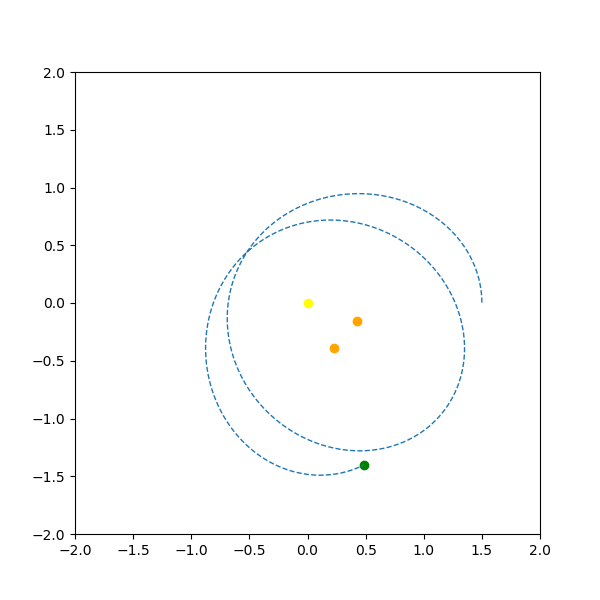

In [61]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

%matplotlib notebook

fig = plt.figure(figsize=(6, 6))
ax1 = fig.add_subplot(111, xlim=(-2, 2), ylim=(-2, 2))
# ax2 = fig.add_subplot(122, xlim=(-2, 2), ylim=(-1.5, 1.5))


def init():
    pl_dot.set_data([], [])
    rphi.set_data([], [])
    # energy.set_data([], [])
    massc_dot.set_data([], [])
    return pl_dot, rphi, massc_dot, # energy


def redraw(i, pl_dot, rphi, massc_dot, p, dt):
    p.step(dt)
    
    pl_dot.set_data(p.r[:2])
    rphi.set_data(p.R[:2])
    # energy.set_data(p.R[0], p.E)
    massc_dot.set_data(p.Rm[:2])
    return pl_dot, rphi, massc_dot, # energy


dt = 0.01
p = planet(isAdditive=True)

pl_dot, = ax1.plot(p.r[:2], 'bo', c='green', lw=1)
rphi, = ax1.plot(p.r[:2], ls='--', lw=1) 
center, = ax1.plot(0, 0, 'bo', c='yellow', lw=3)
massc_dot, = ax1.plot([], [], 'bo', c='orange', lw=1)
# energy, = ax2.plot([], [], c='green', lw=1)

anim = animation.FuncAnimation(fig,
                               redraw,
                               frames=600,
                               init_func=init,
                               interval=10,
                               blit=True,
                               fargs=(pl_dot,
                                      rphi,
                                      # energy,
                                      massc_dot,
                                      p, dt,)
                               )